# Natural Language Processing

In this notebook, we'll walk through some simple natural language processing techniques and work towards building a text classification model. Through this process we'll utilize the data science pipeline:

Ingestion &rarr; Wrangling &rarr; Analysis &rarr; Modeling &rarr; Visualization

The basic principle will be to fetch HTML data from web pages, then extract the text from it. We will then apply tokenization and tagging to the text to create a basic data structure. In preparation for modeling we'll normalize our text using lemmatization, then remove stopwords and punctuation. After that we'll vectorize our text, then send it to our classification model, which we will evaluate with cross validation. 

## Step One: Fetch Data

For now, we'll simply ingest news articles from the Washington Post by looking up their ID from the short URL. 

In [1]:
import os 
import requests 

WAPO = "http://wpo.st/"

def fetch_wapo(sid="ciSa2"):
    url = WAPO + sid 
    res = requests.get(url) 
    return res.text

story = fetch_wapo()

<!DOCTYPE html> <html itemscope itemtype="http://schema.org/NewsArticle" lang="en" class="blog layout_article rendering-context-www"> <head> <script id="_$cookiemonster">(function(b,m){function d(b,d){this.wl={map:f.map.concat(b||[]),reg:f.reg.concat(d||[])}}var f={reg:[],map:[]};d.prototype.ommNom=function(){return this.nom(!0,void 0)};d.prototype.allows=function(b){return!(-1<this.nom(!1,[b]).indexOf(b))};d.prototype.nom=function(d,f){for(var c=[],l=b.location.hostname.split("").reverse().join("").slice(0,18),g=f||b.cookie.split(";"),a,h,e=0;e<g.length,a=g[e];e++)a=a.trim().split("\x3d")[0].toLowerCase(),-1<this.wl.map.indexOf(a)||c.push(a);for(var k=0;k<this.wl.reg.length,
h=this.wl.reg[k];k++)for(e=h.lastIndex=0;e<g.length,a=g[e];e++)a=a.trim().split("\x3d")[0].toLowerCase(),h.test(a)?-1<c.indexOf(a)&&c.splice(c.indexOf(a),1):0>c.indexOf(a)&&0>this.wl.map.indexOf(a)&&c.push(a);d&&("moc.tsopnotgnihsaw"==l&&(this.wl.reg.length||this.wl.map.length)?setTimeout(function(a){return functi
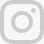

In [2]:
print(story)

## Step Two: Clean Up Data 

The HTML that we fetched contains navigation, advertisements, and markup not related to the text. We need to clean it up to extract only the part of the document we're interested in analyzing. 

Note that this is also the point that we should consider larger document structures like chapters, sections, or paragraphs. If we want to consider paragraphs, the `extract` function should return a list of strings that each represent a paragraph.

In [3]:
from bs4 import BeautifulSoup
from readability.readability import Document

def extract(html):
    article = Document(html).summary()
    soup = BeautifulSoup(article, 'lxml')
    
    return soup.get_text()

story = extract(story)

In [4]:
print(story)

    Doctors and patients watch as Juventus beat Crotone from the hospital overlooking the Ezio Scida stadium on Wednesday. (Ciro De Luca/Reuters)  Officials in the small Italian city of Crotone figured things were going to get wild on Wednesday when Juventus, one of the country’s best and most popular soccer teams, came to town to face its squad. So they made a plan. Along with bumping up security around the coastal city’s sold-out, 16,000-seat stadium, officials also put extra guards around its hospital, according to reports, which happens to be situated across from the stadium and offers some of the best views of the action from its higher floors.    Ospedale San Giovanni di Dio officials wanted to avoid a situation that occurred a decade ago, when the two teams met in a lower-league match that saw several fans disguise themselves as visitors of patients just to stake out a spot at one of the upper-floor windows, Italian sports website CalcioNews24 reports. And so for the day, the ho

## Step Three: Tokenization

Tokenizers break down the text into units of logical meaning - sentences and words.

In [5]:
import nltk 

def tokenize(text):
    for sent in nltk.sent_tokenize(text):
        yield list(nltk.word_tokenize(sent))

story = list(tokenize(story))

In [6]:
for sent in story: print(sent)

['Doctors', 'and', 'patients', 'watch', 'as', 'Juventus', 'beat', 'Crotone', 'from', 'the', 'hospital', 'overlooking', 'the', 'Ezio', 'Scida', 'stadium', 'on', 'Wednesday', '.']
['(', 'Ciro', 'De', 'Luca/Reuters', ')', 'Officials', 'in', 'the', 'small', 'Italian', 'city', 'of', 'Crotone', 'figured', 'things', 'were', 'going', 'to', 'get', 'wild', 'on', 'Wednesday', 'when', 'Juventus', ',', 'one', 'of', 'the', 'country’s', 'best', 'and', 'most', 'popular', 'soccer', 'teams', ',', 'came', 'to', 'town', 'to', 'face', 'its', 'squad', '.']
['So', 'they', 'made', 'a', 'plan', '.']
['Along', 'with', 'bumping', 'up', 'security', 'around', 'the', 'coastal', 'city’s', 'sold-out', ',', '16,000-seat', 'stadium', ',', 'officials', 'also', 'put', 'extra', 'guards', 'around', 'its', 'hospital', ',', 'according', 'to', 'reports', ',', 'which', 'happens', 'to', 'be', 'situated', 'across', 'from', 'the', 'stadium', 'and', 'offers', 'some', 'of', 'the', 'best', 'views', 'of', 'the', 'action', 'from', 'it

## Step Four: Tag Text 

Tagging adds information to the data structure we have -- namely the word class for each word (e.g. is it a Noun, Verb, Adjective, etc.). Note that tagging needs a complete sentence to work effectively. 

After we have tagged our text, we have completed the non-destructive operations on our text string, it is at this point that the text should be saved as a pickle to disk for use in downstream processing. 

In [7]:
def tag(sents):
    for sent in sents:
        yield list(nltk.pos_tag(sent))

story = list(tag(story))

In [8]:
for sent in story: print(sent)

[('Doctors', 'NNS'), ('and', 'CC'), ('patients', 'NNS'), ('watch', 'VBP'), ('as', 'IN'), ('Juventus', 'NNP'), ('beat', 'VBP'), ('Crotone', 'NN'), ('from', 'IN'), ('the', 'DT'), ('hospital', 'NN'), ('overlooking', 'VBG'), ('the', 'DT'), ('Ezio', 'NNP'), ('Scida', 'NNP'), ('stadium', 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('.', '.')]
[('(', '('), ('Ciro', 'NNP'), ('De', 'NNP'), ('Luca/Reuters', 'NNP'), (')', ')'), ('Officials', 'NNPS'), ('in', 'IN'), ('the', 'DT'), ('small', 'JJ'), ('Italian', 'JJ'), ('city', 'NN'), ('of', 'IN'), ('Crotone', 'NNP'), ('figured', 'VBD'), ('things', 'NNS'), ('were', 'VBD'), ('going', 'VBG'), ('to', 'TO'), ('get', 'VB'), ('wild', 'JJ'), ('on', 'IN'), ('Wednesday', 'NNP'), ('when', 'WRB'), ('Juventus', 'NNP'), (',', ','), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('country’s', 'NN'), ('best', 'JJS'), ('and', 'CC'), ('most', 'RBS'), ('popular', 'JJ'), ('soccer', 'NN'), ('teams', 'NNS'), (',', ','), ('came', 'VBD'), ('to', 'TO'), ('town', 'NN'), ('to', 'T

## Step 5: Normalize 

Normalization reduces the number of tokens that we pass to our analysis, allowing us to do more effective language inference. 

In [9]:
from nltk.corpus import wordnet as wn

lemmatizer = nltk.WordNetLemmatizer()

def tagwn(tag):
    return {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)


def lemmatize(tagged_sents):
    for sent in tagged_sents:
        for token, tag in sent:
            yield lemmatizer.lemmatize(token, tagwn(tag))


story = list(lemmatize(story))

In [10]:
print(story)

['Doctors', 'and', 'patient', 'watch', 'a', 'Juventus', 'beat', 'Crotone', 'from', 'the', 'hospital', 'overlook', 'the', 'Ezio', 'Scida', 'stadium', 'on', 'Wednesday', '.', '(', 'Ciro', 'De', 'Luca/Reuters', ')', 'Officials', 'in', 'the', 'small', 'Italian', 'city', 'of', 'Crotone', 'figure', 'thing', 'be', 'go', 'to', 'get', 'wild', 'on', 'Wednesday', 'when', 'Juventus', ',', 'one', 'of', 'the', 'country’s', 'best', 'and', 'most', 'popular', 'soccer', 'team', ',', 'come', 'to', 'town', 'to', 'face', 'it', 'squad', '.', 'So', 'they', 'make', 'a', 'plan', '.', 'Along', 'with', 'bump', 'up', 'security', 'around', 'the', 'coastal', 'city’s', 'sold-out', ',', '16,000-seat', 'stadium', ',', 'official', 'also', 'put', 'extra', 'guard', 'around', 'it', 'hospital', ',', 'accord', 'to', 'report', ',', 'which', 'happen', 'to', 'be', 'situate', 'across', 'from', 'the', 'stadium', 'and', 'offer', 'some', 'of', 'the', 'best', 'view', 'of', 'the', 'action', 'from', 'it', 'high', 'floor', '.', 'Osped

In [14]:
from string import punctuation
from nltk.corpus import stopwords 

punctuation = set(punctuation)
stopwords = set(stopwords.words('english'))

def normalize(tokens):
    for token in tokens:
        token = token.lower()
        if not all(char in punctuation for char in token):
            if token not in stopwords:
                yield token
        

story = list(normalize(story))

In [15]:
print(story)

['doctors', 'patient', 'watch', 'juventus', 'beat', 'crotone', 'hospital', 'overlook', 'ezio', 'scida', 'stadium', 'wednesday', 'ciro', 'de', 'luca/reuters', 'officials', 'small', 'italian', 'city', 'crotone', 'figure', 'thing', 'go', 'get', 'wild', 'wednesday', 'juventus', 'one', 'country’s', 'best', 'popular', 'soccer', 'team', 'come', 'town', 'face', 'squad', 'make', 'plan', 'along', 'bump', 'security', 'around', 'coastal', 'city’s', 'sold-out', '16,000-seat', 'stadium', 'official', 'also', 'put', 'extra', 'guard', 'around', 'hospital', 'accord', 'report', 'happen', 'situate', 'across', 'stadium', 'offer', 'best', 'view', 'action', 'high', 'floor', 'ospedale', 'san', 'giovanni', 'di', 'dio', 'official', 'want', 'avoid', 'situation', 'occur', 'decade', 'ago', 'two', 'team', 'meet', 'lower-league', 'match', 'saw', 'several', 'fan', 'disguise', 'visitor', 'patient', 'stake', 'spot', 'one', 'upper-floor', 'window', 'italian', 'sport', 'website', 'calcionews24', 'report', 'day', 'hospita